<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score, f1_score
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE

# Random Forest

In [283]:
# Download the dataset from UCI repository
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ["age", "workclass", "fnlweight", "education", "education-num", "marital-status", "occupation",
         "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
adult_df = pd.read_csv(url, header=None, names=names)

# Convert the target variable to binary labels
adult_df["income"] = np.where(adult_df["income"] == " >50K", 1, 0)
# drop any missing values
adult_df = adult_df.dropna()
# Encode categorical variables using one-hot-encoding
cat_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
adult_df_encoded = pd.get_dummies(adult_df, columns=cat_cols)

# Split into features (X) and target (y)
X = adult_df_encoded.drop("income", axis=1)
y = adult_df_encoded["income"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (26048, 108)
X_test shape: (6513, 108)
y_train shape: (26048,)
y_test shape: (6513,)


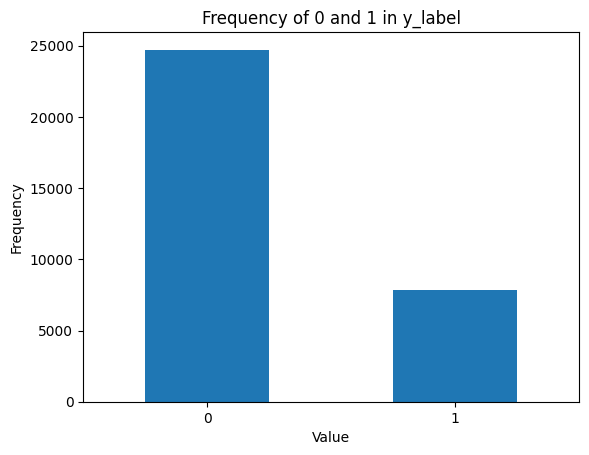

In [284]:
# Label distribution
# Count the occurrences of each value
value_counts = y.value_counts()

# Plotting
value_counts.plot(kind="bar")
plt.title("Frequency of 0 and 1 in y_label")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [285]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [286]:
# Evaluate the model's accuracy
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.860586519269154


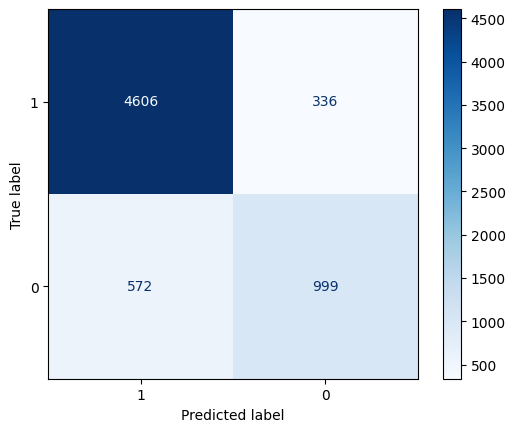

In [287]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
# Plot the confusion matrix
cmd.plot(cmap="Blues")
plt.show()

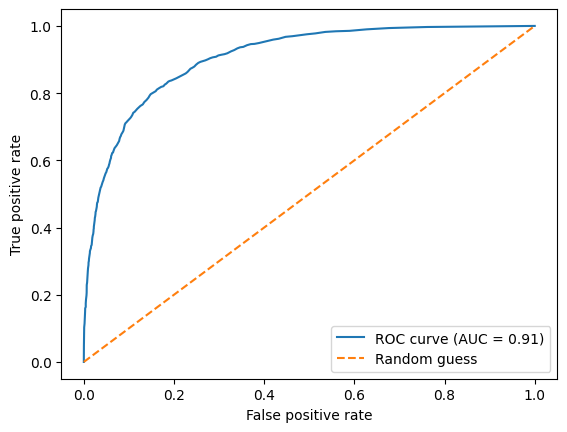

In [288]:
# Compute predicted probabilities of the positive class
y_proba = rf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Compute the area under ROC curve
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0,1], [0,1], linestyle="--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [289]:
# Initialize an XGBoost classifier with default hyperparameters
xgb_clf = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Make predicitions on the testing data
y_pred = xgb_clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8739444188545985


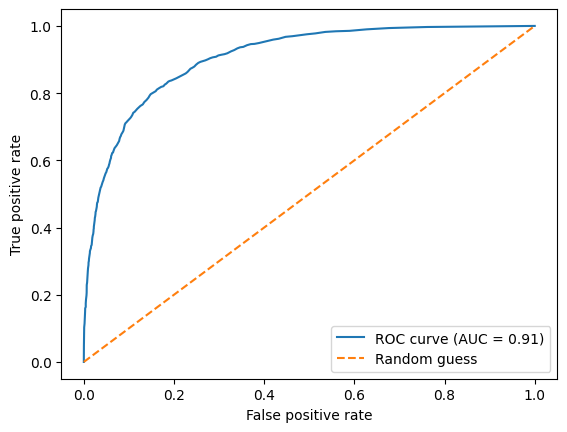

In [290]:
# Compute predicted probabilities of the positive class
y_prova = xgb_clf.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, threshold = roc_curve(y_test, y_proba, pos_label=1)

# Compute the area nder the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0,1], [0,1], linestyle="--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

# Sentiment Analysis

In [291]:
!git clone https://github.com/hafidhfikri/Practice-Twitter-Sentiment-Analysis.git

fatal: destination path 'Practice-Twitter-Sentiment-Analysis' already exists and is not an empty directory.


In [292]:
# Load csv file
df_twt = pd.read_csv("Practice-Twitter-Sentiment-Analysis/train_E6oV3lV.csv")
df_twt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [293]:
df_twt.shape

(31962, 3)

In [294]:
df_twt["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

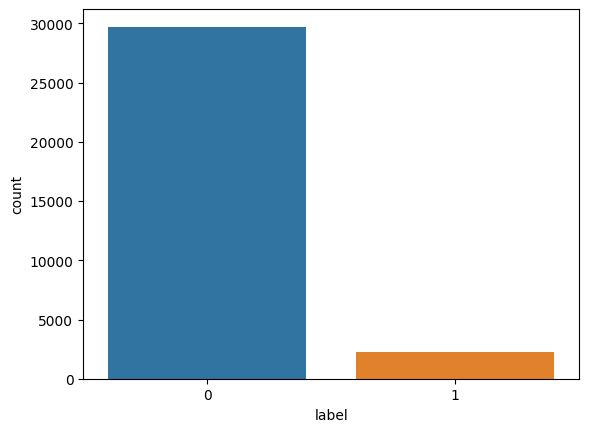

In [295]:
ax = sns.countplot(df_twt, x="label")

In [296]:
# Removing usernames from tweet
df_twt["new_tweet"] = df_twt.tweet.str.replace("@user", '')
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [297]:
# Removing punctuations. numbers, and special characters
# [a-zA-Z] = Any single character in range a-z or A-Z
# ^ = Start of line
# $ = End of line

df_twt["new_tweet"] = df_twt["new_tweet"].str.replace("[^a-zA-Z#]", ' ')
df_twt["new_tweet"] = df_twt["new_tweet"].str.replace("#", '')
df_twt.head()

<ipython-input-297-a13987824b9f>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twt["new_tweet"] = df_twt["new_tweet"].str.replace("[^a-zA-Z#]", ' ')


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [298]:
# Get most common words in training dataset
from collections import Counter
all_words = []
for line in list(df_twt["new_tweet"]):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

a = Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [299]:
# Tokenization
df_twt["new_tweet"] = df_twt["new_tweet"].apply(lambda x: x.split())
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


# Stemming

In [300]:
# Stemmer
stemmer = SnowballStemmer("english")
df_twt["new_tweet"] = df_twt["new_tweet"].apply(lambda x: [stemmer.stem(i) for i in x])
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [301]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [302]:
# stopwords = set(stopwords.words("english"))
stopwords = nltk.corpus.stopwords.words("english")

In [303]:
newStopWords = ['u', 'go', 'got', 'via', 'or', 'ur', 'us', 'in', 'let', 'the', 'to', 'is', 'amp', 'make', 'one', 'day', 'days', 'get']
len(newStopWords)

18

In [304]:
if all(elem in stopwords for elem in newStopWords):
  print("All words in list1 are in list2")
else:
  print("At least one word in list1 is not in list2")

At least one word in list1 is not in list2


In [305]:
count = 0
for word in newStopWords:
  if word not in stopwords:
    count += 1

print(f"{count} words are not in the other list.")

13 words are not in the other list.


In [306]:
stopwords.extend(newStopWords)

In [307]:
def process(text):
  # Check characters to see if they are in punctuation
  nopunc = set(char for char in list(text) if char not in string.punctuation)
  # Join the characters to form the string.
  nopunc = " ".join(nopunc)
  # Remove any stopwords if present
  return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [308]:
df_twt["new_tweet"] = df_twt["new_tweet"].apply(process)
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[father, drag, selfish, run, dysfunct, kid]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[offer, disapoint, credit, van, pdx, lyft, use..."
2,3,0,bihday your majesty,"[majesti, bihday]"
3,4,0,#model i love u take with u all the time in ...,"[model, time, take, love]"
4,5,0,factsguide: society now #motivation,"[factsguid, societi, motiv]"


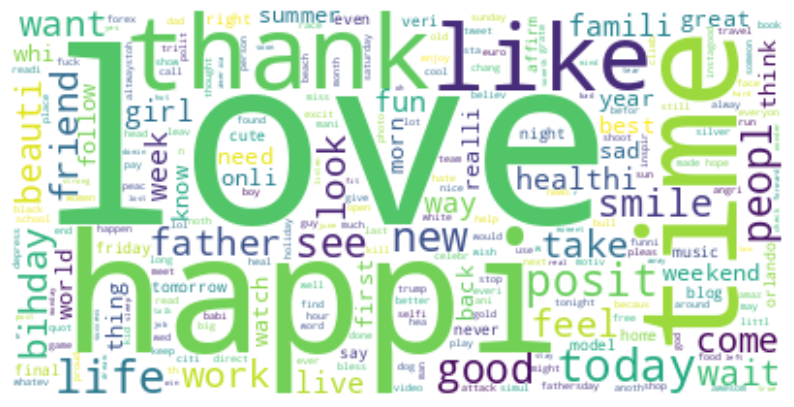

In [309]:
# Split sentences to get individual words
words = []
for line in df_twt["new_tweet"]:
  words.extend(line)

# Create a word frequency dictionary
wordfreq = Counter(words)
# Draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words = 2000,
    stopwords = stopwords
    ).generate_from_frequencies(wordfreq)

plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [310]:
def string(text):
  to_return = ""
  for i in list(text):
    to_return += str(i) + " "
  to_return = to_return[:-1]
  return to_return

df_twt["new_tweet"] = df_twt["new_tweet"].apply(string)
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,father drag selfish run dysfunct kid
1,2,0,@user @user thanks for #lyft credit i can't us...,offer disapoint credit van pdx lyft use wheelc...
2,3,0,bihday your majesty,majesti bihday
3,4,0,#model i love u take with u all the time in ...,model time take love
4,5,0,factsguide: society now #motivation,factsguid societi motiv


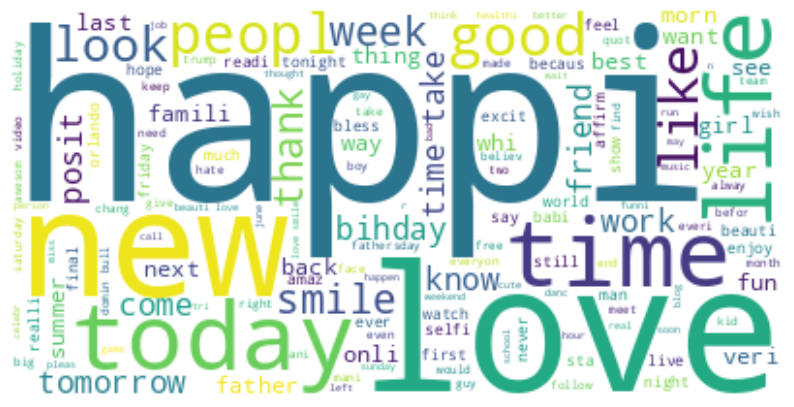

In [311]:
positive = [r for r in df_twt["new_tweet"][df_twt["label"]==0]]
pos = "".join(positive)

# Draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=stopwords
  ).generate(pos)

plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

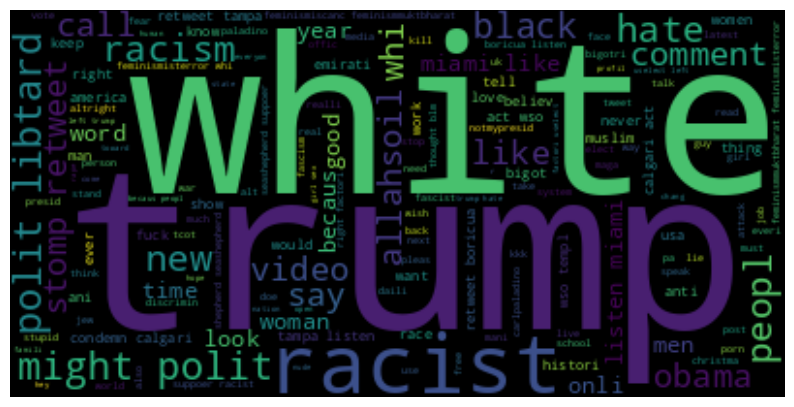

In [312]:
negative = [r for r in df_twt["new_tweet"][df_twt["label"]==1]]
neg = "".join(negative)

# Draw a Wor Cloud with word frequencies
wordcloud = WordCloud(
    background_color="black",
    max_words=2000,
    stopwords=stopwords
    ).generate(neg)

plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [313]:
df_twt.drop(["id", "tweet"], axis=1, inplace=True)
df_twt.head()

,label,new_tweet
0,0,father drag selfish run dysfunct kid
1,0,offer disapoint credit van pdx lyft use wheelc...
2,0,majesti bihday
3,0,model time take love
4,0,factsguid societi motiv


In [314]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_twt["new_tweet"], df_twt["label"], test_size=0.2, random_state=42)
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (25569,) (25569,)
Test set: (6393,) (6393,)


In [315]:
count_vect = CountVectorizer(stop_words="english")
transformer = TfidfTransformer(norm='l2', sublinear_tf=True)

In [316]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(X_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 27304)
(25569, 27304)


In [317]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 27304)
(6393, 27304)


In [318]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [319]:
predictions = model.predict(x_test_tfidf)

In [320]:
# Accuracy score
accuracy_score(y_test, predictions) * 100

96.15204129516658

In [321]:
confusion_matrix(y_test, predictions)

array([[5901,   36],
       [ 210,  246]])

In [322]:
f1_score(y_test, predictions)

0.6666666666666667

In [323]:
logmodel = LogisticRegression(random_state=400)
logmodel.fit(x_train_tfidf, y_train)

LogisticRegression(random_state=400)

In [324]:
log_predictions = logmodel.predict(x_test_tfidf)

In [325]:
confusion_matrix(y_test, log_predictions)

array([[5925,   12],
       [ 309,  147]])

In [326]:
f1_score(y_test, log_predictions)

0.47804878048780486

In [327]:
accuracy_score(y_test, log_predictions)*100

94.97888315344909

In [328]:
# Create DMatrix from the training data
# Create XGBClassifier object and train it
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [329]:
xgb_predictions = xgb_model.predict(x_test_tfidf)

In [330]:
confusion_matrix(y_test, xgb_predictions)

array([[5897,   40],
       [ 254,  202]])

In [331]:
f1_score(y_test, xgb_predictions)

0.5787965616045845

In [332]:
# Instantiate SMOTE object
sm = SMOTE(random_state=42)

# Fit SMOTE on training data
x_train_tfidf_resampled, y_train_resampled = sm.fit_resample(x_train_tfidf, y_train)

# Check the class distribution after resampling
print("After resampling:\n", y_train_resampled.value_counts())

After resampling:
 1    23783
0    23783
Name: label, dtype: int64


In [333]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf_resampled, y_train_resampled)
predictions = model.predict(x_test_tfidf)
f1_score(y_test, predictions)

0.6809470124013529

In [334]:
# Create DMatrix from the training data
xgb_resample = xgb.XGBClassifier()
xgb_resample.fit(x_train_tfidf_resampled, y_train_resampled)
xgb_pred_resample = xgb_resample.predict(x_test_tfidf)

In [335]:
f1_score(y_test, xgb_pred_resample)

0.6220735785953176